/home/fonttian/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


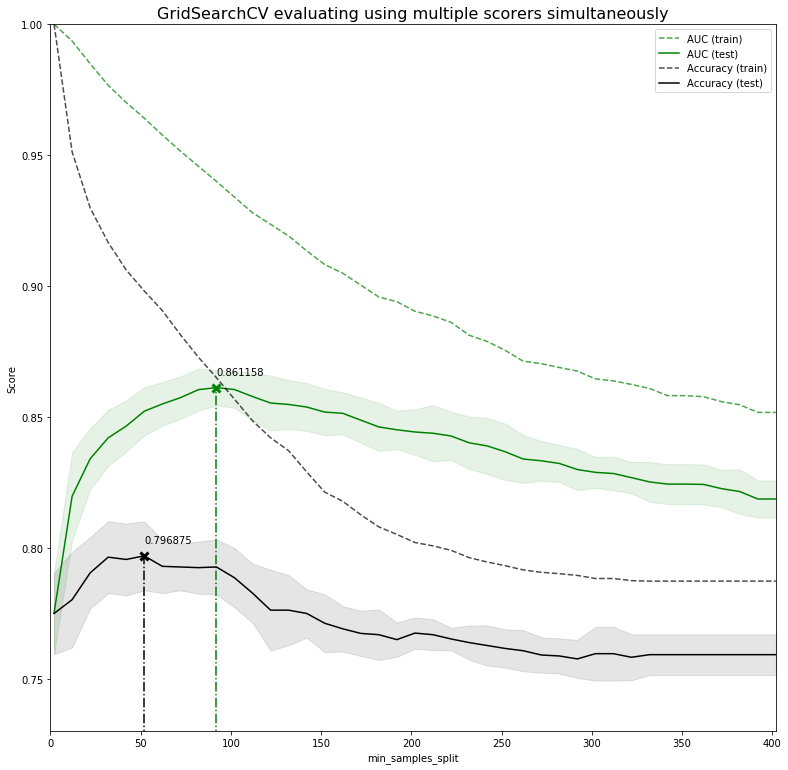

In [11]:
"""
============================================================================
Demonstration of multi-metric evaluation on cross_val_score and GridSearchCV
============================================================================

Multiple metric parameter search can be done by setting the ``scoring``
parameter to a list of metric scorer names or a dict mapping the scorer names
to the scorer callables.

The scores of all the scorers are available in the ``cv_results_`` dict at keys
ending in ``'_<scorer_name>'`` (``'mean_test_precision'``,
``'rank_test_precision'``, etc...)

The ``best_estimator_``, ``best_index_``, ``best_score_`` and ``best_params_``
correspond to the scorer (key) that is set to the ``refit`` attribute.
"""

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


###############################################################################
# Running ``GridSearchCV`` using multiple evaluation metrics
# ----------------------------------------------------------
#

X, y = make_hastie_10_2(n_samples=8000, random_state=42)

# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_parameters_`` and
# ``gs.best_index_``
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid={'min_samples_split': range(2, 403, 10)},
                  scoring=scoring, cv=5, refit='AUC')
gs.fit(X, y)
results = gs.cv_results_

###############################################################################
# Plotting the result
# -------------------

plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.6f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [3]:
gs.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(2, 403, 10)},
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score=True,
       scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)},
       verbose=0)>

In [3]:
# results
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=92,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [5]:
gs.best_params_

{'min_samples_split': 92}

In [6]:
results

{'mean_fit_time': array([ 0.12158585,  0.12110491,  0.11624713,  0.11454048,  0.12002654,
         0.11430168,  0.11175518,  0.11248522,  0.14940953,  0.15105619,
         0.14075122,  0.11297464,  0.10580835,  0.10489917,  0.10402312,
         0.10420179,  0.11079736,  0.10801349,  0.11288595,  0.09981971,
         0.11513166,  0.09792938,  0.10183392,  0.09832673,  0.10395317,
         0.10127063,  0.09710541,  0.09772081,  0.09668608,  0.09700365,
         0.0953557 ,  0.09620409,  0.10671515,  0.09441957,  0.09486127,
         0.09893312,  0.09370317,  0.09448271,  0.09528737,  0.09384775,
         0.09311337]),
 'mean_score_time': array([ 0.00199332,  0.00193911,  0.00195403,  0.00202069,  0.00257864,
         0.00191307,  0.00194969,  0.0024756 ,  0.00296826,  0.00477672,
         0.00243244,  0.00193744,  0.00186234,  0.00178986,  0.00276365,
         0.00189023,  0.00208735,  0.00195456,  0.00262556,  0.00184379,
         0.00191555,  0.00190668,  0.00190849,  0.00185862,  0.00